#**SCALER- Clustering in Learning Profiling** (Business Case)

### **About**:
 Scaler is an Emerging tech versity, it Aims to provide world-class education in computer science & data science domains.
 One of the challenges for Scaler is to understand the diverse backgroud of its learners especially in terms of their current roles,companies and experience.
 this case study aims to present how online tech versities like Scaler can operate and face the challenges in learners profiling. The goal of this case study is to  Group learners with similar profile and interests which in turn helps Scaler in creating tailored contet recommendations and provide specialized mentorship for delivering a more personalised learning jouney for
  each learners.

In [2]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Creating a data frame For the data set
df=pd.read_csv('/content/drive/MyDrive/scaler_clustering.csv')

In [4]:
#first 5 records from the data frame
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [5]:
df.shape

(205843, 7)

### **Observations**


1.   The Data frame contains 205843 rows and 7 columns
2.   Each column represent specific infomation

     **Unnamed**: Represents the index of the data
     Company_hash: this column is a hashed value

     **Company_hash**: A hashed value representing the company name,This hashing is used to anonymize the company names for privacy reasons

     **email_hash**: A hashed value of the learners email address

     **orgyear**: Represents the year the learner bagan employment at the current company

     **CTC**: Total annual compensation or salary of the learner

     **Job_position**: Represents Role of the learner with their company

     **CTC_updated_year**: The year when the CTC was last updated


     


In [6]:
#Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


### **Observations**


1.   The data types of **Orgyear**, **ctc_updated_year** can be changed to integer type
2.   The size of the data frame is **205843** records, but looking at the above information we can confirm that there are null /missing values in the data, further investication is needed to understand the presence of missing values in each column




In [7]:
#Statistical summary of the data
df['ctc'].describe()

count    2.058430e+05
mean     2.271685e+06
std      1.180091e+07
min      2.000000e+00
25%      5.300000e+05
50%      9.500000e+05
75%      1.700000e+06
max      1.000150e+09
Name: ctc, dtype: float64

**Observations**


1.   The Mean CTC per learns is around 22 Lakhs
2.   The Minimum CTC is 2 is highly unlikely to be a valid CTC which indicates that there is presence of outliers in the data or its a erroneous data entry
3. 50% of the learners have got the CTC below 9.5 lakhs
4. Max CTC is 1 billion which is likely be an outlier




In [8]:
#Null values check
df.isnull().sum()/df.shape[0]*100

Unnamed: 0           0.000000
company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.535967
ctc_updated_year     0.000000
dtype: float64

**Observation**
1. 3 columns, company_hash,orgyearand job_position columns have null values
2. more than 25% of the null values are present in job_position column
3. 25% of missing information can be filled with the help of KNN imputation


## **Non Graphical Analysis**

In [9]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [10]:
#missing value treatment
print('Total number of null values in Company hash column =',df['company_hash'].isna().sum())
print('Total number of null values in Orgyear column =',df['orgyear'].isna().sum())
print('Total number of null values in Job_position column =',df['job_position'].isna().sum())

Total number of null values in Company hash column = 44
Total number of null values in Orgyear column = 86
Total number of null values in Job_position column = 52564


In [11]:
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()  #creating an object for encoder class

#categorical columns
categorical_columns=['company_hash','job_position','orgyear']
#encoding categorical columns
encoded_data=encoder.fit_transform(df[categorical_columns])

#applyng the KNN imputer
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3,weights='uniform')
imputed_data=imputer.fit_transform(encoded_data)

In [12]:
#converting encoded data back to normal
imputed_categorical_data=encoder.inverse_transform(imputed_data)

In [13]:
#final data frame
df_imputed=pd.DataFrame(imputed_categorical_data,columns=categorical_columns)
#Replacing the imputed data back to main data frame
df[categorical_columns]=df_imputed
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [14]:
#null values check
df.isna().sum()

Unnamed: 0          0
company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

**Observation**

There were no null values present in the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205843 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205843 non-null  object 
 4   ctc               205843 non-null  int64  
 5   job_position      205843 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 11.0+ MB


**Observation**

1. we can remove "Unnamed:0 column"
2. we can change the data type of "orgyear","ctc_updated_year" columns to integer

In [16]:
#dropping Unnamed column
df.drop(columns='Unnamed: 0',inplace=True)

In [17]:
#changing the Type
df['orgyear']=df['orgyear'].astype('int')
df['ctc_updated_year']=df['ctc_updated_year'].astype('int')
df.info()
#every thing looks fine now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      205843 non-null  object
 1   email_hash        205843 non-null  object
 2   orgyear           205843 non-null  int64 
 3   ctc               205843 non-null  int64 
 4   job_position      205843 non-null  object
 5   ctc_updated_year  205843 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 9.4+ MB


In [18]:
#checking for employment year
df['orgyear'].value_counts()

orgyear
2018    25272
2019    23431
2017    23249
2016    23067
2015    20620
        ...  
2107        1
1972        1
2101        1
208         1
200         1
Name: count, Length: 77, dtype: int64

**Observation**:

Most of the learners started their employment in the years 2018,2019,2017,2016,2015. repectively

In [19]:
#checking for last updated CTC for learners
print(df['ctc_updated_year'].value_counts(),'\n')

print('Percentage hikes\n')
print(df['ctc_updated_year'].value_counts(normalize=True).head(2)*100)

ctc_updated_year
2019    68688
2021    64976
2020    49444
2017     7561
2018     6746
2016     5501
2015     2927
Name: count, dtype: int64 

Percentage hikes

ctc_updated_year
2019    33.369121
2021    31.565805
Name: proportion, dtype: float64


**Observation**

Majority of the CTC updates were occured in the years 2019,2021,2020

1.   highest updates were occured during the year 2019 (68688) which indicates that 33% of learners have their CTC updated in the year 2019.
2.   there is significant decline in updates as we go o time
3.   the numbers significantly dropped before 2019, with 2015 as the least number of ctc updates, indicating that not many learners have got he hikes in these years
4. the increase in number of CTC updates in the years 2019 and 2020 is partially attributed as evolving job market during the pandemic
5. the rapid shift in digital transformation has likely resulted in increased demand for tech related jobs and skills possibily explaing high numbe of CTC updates as people moved into these roles

In [20]:
#duplicate values check
print('Total numbe of duplicate records in the Data frame:', df.duplicated().sum())

Total numbe of duplicate records in the Data frame: 1107


In [21]:
#droping duplicated records
df.drop_duplicates(inplace=True)
print('Total number of duplicates in the Data Frame=',df.duplicated().sum())

Total number of duplicates in the Data Frame= 0


In [22]:
df.duplicated().sum()

0

## **Visual Analysis**

### **Univariate Analysis**

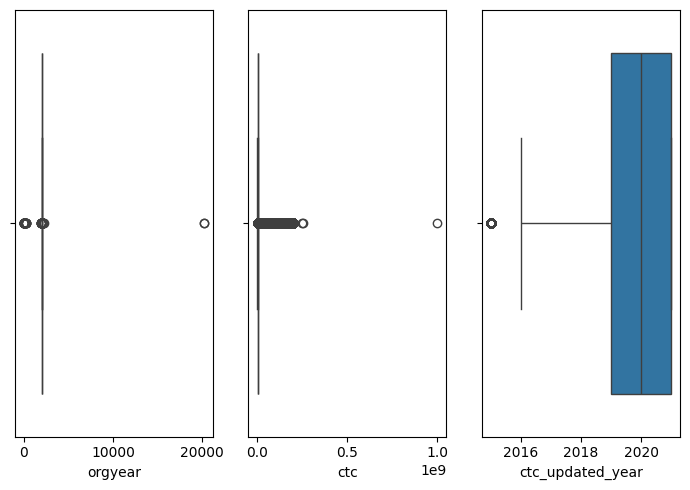

In [23]:
#Box plot for numerical columns
numerical_columns=df.select_dtypes(include=['number'])

#set the figure size
plt.figure(figsize=(7,5))

#iterate over the numerical columns

for i,column in enumerate(numerical_columns.columns,1):
  plt.subplot(1,3,i)
  sns.boxplot(data=df,x=column)
plt.tight_layout()
plt.show()

**Observation**

1. Box plots doesn't looks good because of high variance in the data

2. May be scaling the data and then visulizing will solve the problem

3. it is evident that there is presence of outliers in the 3 columns

In [24]:
#observing the outlier values in orgyear
sorted_ctc_df=df.sort_values(by='orgyear')
print('possible outliers\n',pd.unique(sorted_ctc_df['orgyear'].head(45).values))
print(pd.unique(sorted_ctc_df['orgyear'].tail(10).values))

possible outliers
 [   0    1    2    3    4    5    6   38   83   91  200  201  206  208
  209 1900 1970]
[ 2031  2101  2106  2107  2204 20165]


**Observation**

1. The array provided **orgyear** column values which presents as outliers
2. outllier treatment must be done


orgyear
2018    25033
2019    23311
2017    23149
2016    22944
2015    20453
        ...  
2107        1
2101        1
1981        1
1973        1
1900        1
Name: count, Length: 63, dtype: int64


<Axes: xlabel='orgyear'>

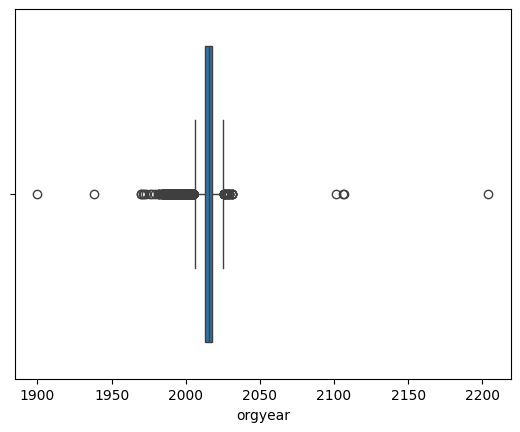

In [25]:
# Create a dictionary to map incorrect year values to correct ones
year_corrections = {
    0: 2000,1: 2001,2: 2002,3: 2003,4: 2004,5: 2005,6: 2006,38: 1938,83: 1983,91:
    1991,200: 2000,201: 2001,206: 2006,208: 2008,209: 2009,20165:2016
}

# Replace incorrect year values using the dictionary
df['orgyear'] = df['orgyear'].replace(year_corrections)

# Print the value counts again to verify the changes
print(df['orgyear'].value_counts())
sns.boxplot(data=df,x='orgyear')

**Outlier Treatment for numerical columns**

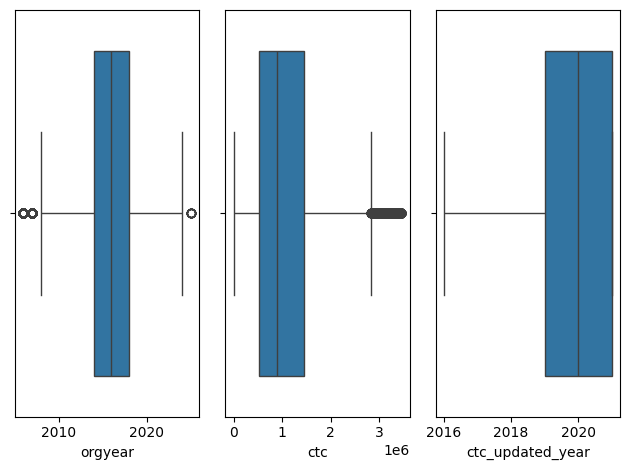

In [26]:
numerical_columns=df.select_dtypes(include=['number'])
for column in numerical_columns.columns:
  # Calculate Q1 (25th percentile) and Q3 (75th percentile)
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  # Calculate IQR
  IQR = Q3 - Q1
  #upper and lower bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Identify outliers
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  # Replace outliers with NaN
  df[column] = df[column].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)
  # Optionally, you can impute the NaN values with the median of the valid 'orgyear' values
  df[column] = df[column].fillna(df[column].median())

for i,column in enumerate(numerical_columns.columns,1):
  plt.subplot(1,3,i)
  sns.boxplot(data=df,x=column)
plt.tight_layout()
plt.show()




**Observation**

Looks like there is still presense of outliers in the "CTC" column

In [27]:
# df['ctc'].nsmallest(200).unique()

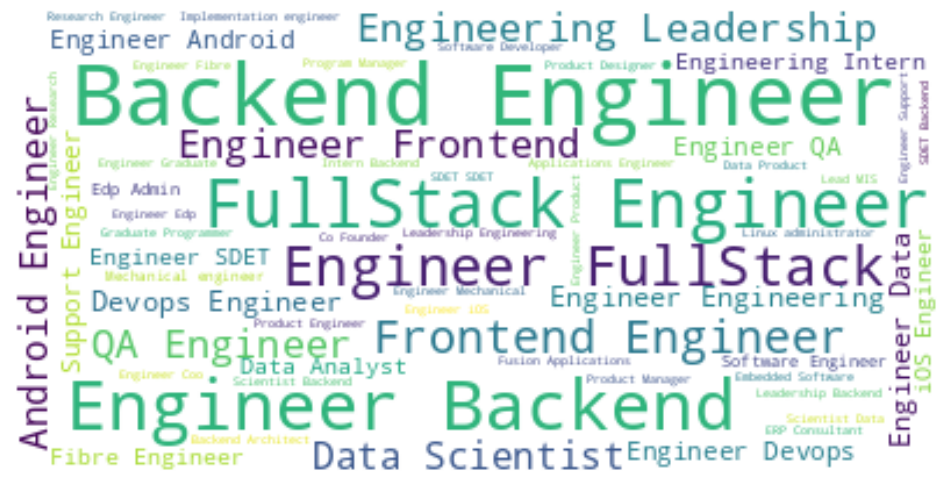

In [28]:
from wordcloud import WordCloud,STOPWORDS

#joining all the text
text= " ".join(job for job in df.job_position)
wordcloud=WordCloud(stopwords=STOPWORDS,background_color='White').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Observation**

1. Backend Engineer is the Most prominent job positons among all
2. we can see Data scientist data analyst roles are less popular among all the job positions

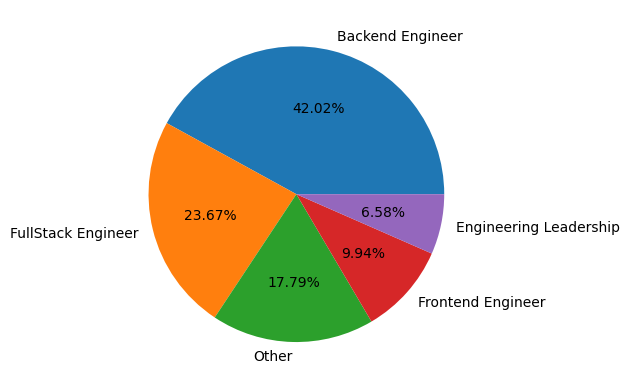

In [29]:
#Propotion of JOB positions
job_position_count=df['job_position'].value_counts().head(5)
plt.pie(job_position_count,labels=job_position_count.index,autopct='%.2f%%')
plt.show()

**Observation**

1. Most of the learners are Working as **"Backend Engineers"** followed by **Full stack** and **Frontend** Engineers
2. which indicates high demand for **Web Development skills**
3. High propotion of  Backend engineers indicates that there is high demand for
server side development, data management and API integration skills
3. to understand the propotion of job positions here we used relative percentages
4. There were no Data scients,AI engineers,Data analysts in Top 5 postions which indicates that there is pontial growth for these roles in coming market



In [30]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,FullStack Engineer,2019.0


In [31]:
# sns.barplot(x='job_position',y='orgyear',data=df)
# plt.xticks(rotation=90)
# # plt.show()

## **Bivariate analysis**

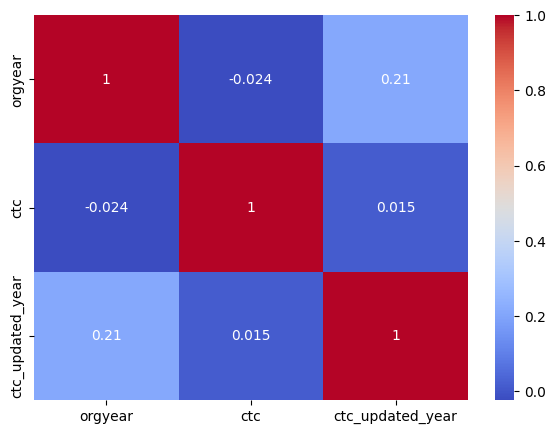

In [32]:
plt.figure(figsize=(7,5))
sns.heatmap(numerical_columns.corr(),annot=True,cmap='coolwarm')
plt.show()

**Observation**

it is observed that there is very week correlation among all the numerical column in the data which indicates that there is nonlinear relationship among these features

<ipython-input-33-335649815a58>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_position',data=top_jobs,palette='viridis',order=top_20_job_positions)


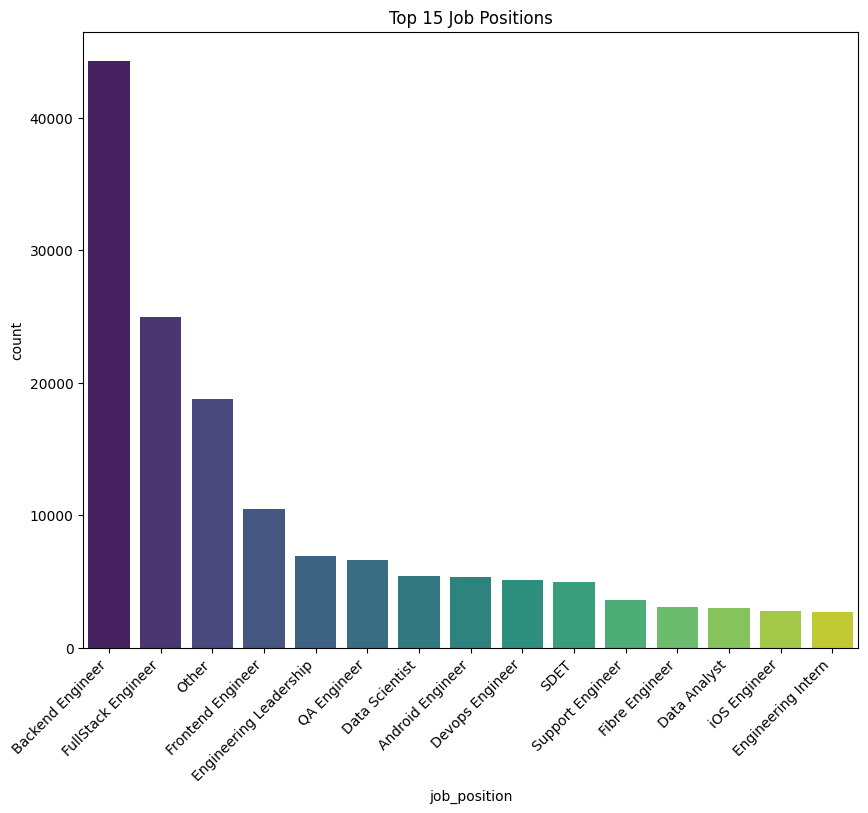

In [33]:
top_20_job_positions=df['job_position'].value_counts().nlargest(15).index
top_jobs=df[df['job_position'].isin(top_20_job_positions)]

plt.figure(figsize=(10,8))
plt.title('Top 15 Job Positions')
sns.countplot(x='job_position',data=top_jobs,palette='viridis',order=top_20_job_positions)
plt.xticks(rotation=45,ha='right')
plt.show()

**Observation**


There is  highdemand for Backend  and fullStack enginners



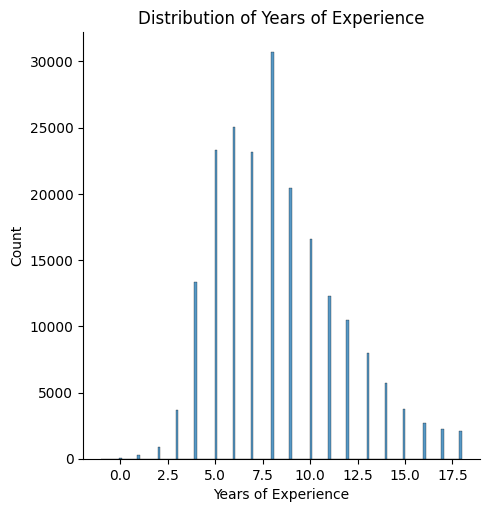

In [43]:
from datetime import datetime
current_year=datetime.now().year


df['years_of_experience']=current_year-df['orgyear']
sns.displot(df['years_of_experience'])
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience')
plt.show()

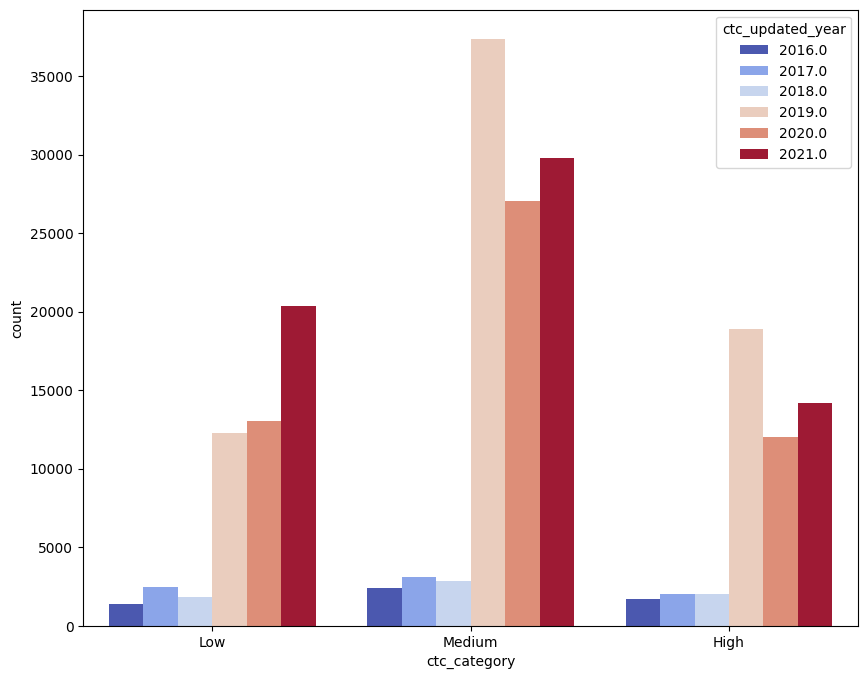

In [36]:
bins=[0,530000,1450000,float('inf')]
labels=['Low','Medium','High']
df['ctc_category'] = pd.cut(df['ctc'],bins=bins,labels=labels)
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='ctc_category',palette='coolwarm',hue='ctc_updated_year')
plt.show()

**Observation**

1. Learners have been categorized into 3 categories low,medium and high based on 0th,50th and 75th percentiles respectively
2. A significant number of learners from Low CTC category  had their CTC updated in the year  2021
3. A significant number of learners from Medium CTC category had their CTC updated in the year 2019
4. A significant number of learners from High ctc category had thier ctc updated in the year 2019

<ipython-input-60-466c5822ee86>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=mean_ctc_by_role.index,x=mean_ctc_by_role.values,palette='coolwarm')


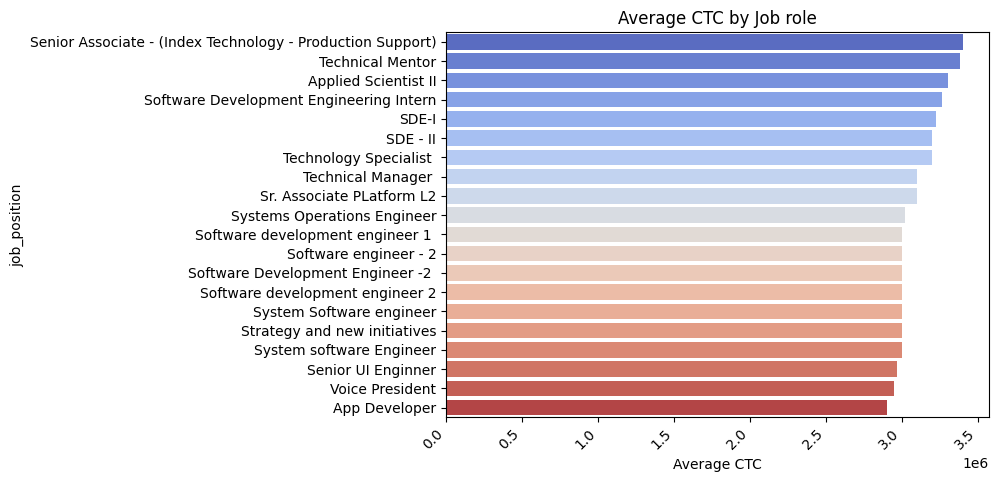

In [60]:
#average ctc per company#average ctc per job role
mean_ctc_by_role=df.groupby('job_position')['ctc'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(7,5))
sns.barplot(y=mean_ctc_by_role.index,x=mean_ctc_by_role.values,palette='coolwarm')

plt.title('Average CTC by Job role')
plt.xlabel('Average CTC')
plt.xticks(rotation=45,ha='right')
plt.show()

**Observation**

1. The Job positon "Senior Associate " has got the highest Average CTC among top 20 Job roles
2. for learners looking to maximize their earning targeting roles like "Technical mentor","Applied Scientist" and "Senior associate" roles might be the best strategic career moves

<ipython-input-74-331465028196>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ctc_by_experience.values,x=ctc_by_experience.index,palette='coolwarm')


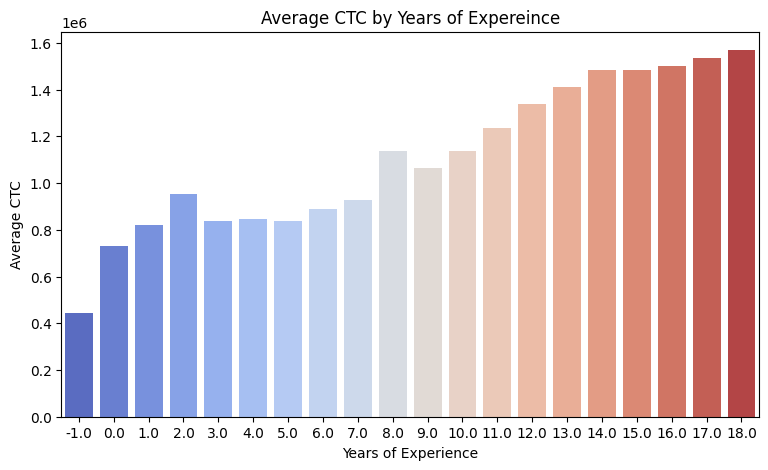

In [74]:
# average ctc based on years of experience
ctc_by_experience=df.groupby('years_of_experience')['ctc'].mean().sort_values(ascending=True)
plt.figure(figsize=(9,5))
sns.barplot(y=ctc_by_experience.values,x=ctc_by_experience.index,palette='coolwarm')
plt.title('Average CTC by Years of Expereince')
plt.xlabel('Years of Experience')
plt.ylabel('Average CTC')
plt.show()

**Observation**

1. Learners with high experience are having highest average salary
2. years of experience =-1 indicates that learner has got joing letter in 2025
3. years of experience =0 indicatest that learner was recently joined

### **Data Preparation for Model**

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204736 entries, 0 to 205842
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   company_hash         204736 non-null  object  
 1   email_hash           204736 non-null  object  
 2   orgyear              204736 non-null  float64 
 3   ctc                  204736 non-null  float64 
 4   job_position         204736 non-null  object  
 5   ctc_updated_year     204736 non-null  float64 
 6   ctc_category         204736 non-null  category
 7   years_of_experience  204736 non-null  float64 
dtypes: category(1), float64(4), object(3)
memory usage: 12.7+ MB


In [81]:
#encong Job_position column
job_freq=df['job_position'].value_counts().to_dict()
df['job_position_encoded']=df['job_position'].map(job_freq)


In [89]:
#encoding ctc_category column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['ctc_category_encoded']=le.fit_transform(df[['ctc_category']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
df_kmeans=df.drop(columns=['company_hash','email_hash','job_position','ctc_category'])
df_kmeans.head()
#now the data frame contains only numerical values

,orgyear,ctc,ctc_updated_year,years_of_experience,job_position_encoded,ctc_category_encoded
0,2016.0,1100000.0,2020.0,8.0,18739,2
1,2018.0,449999.0,2019.0,6.0,24937,1
2,2015.0,2000000.0,2020.0,9.0,44263,0
3,2017.0,700000.0,2019.0,7.0,44263,2
4,2017.0,1400000.0,2019.0,7.0,24937,2


In [94]:
#Scaling the data frame
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_kmeans)

In [96]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204736 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   orgyear               204736 non-null  float64
 1   ctc                   204736 non-null  float64
 2   ctc_updated_year      204736 non-null  float64
 3   years_of_experience   204736 non-null  float64
 4   job_position_encoded  204736 non-null  int64  
 5   ctc_category_encoded  204736 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 10.9 MB


In [39]:
df['job_position'].nunique()

1016